# Seaborn Library

## Matplotlib

Try to use Matplotlib, using its classic plot formatting and colors.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Now we create some random walk data by creating some data.

In [3]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

In [4]:
x.shape

(500,)

In [5]:
y.shape

(500, 6)

Do a simple plot by using the data with Matplotlib defaults.

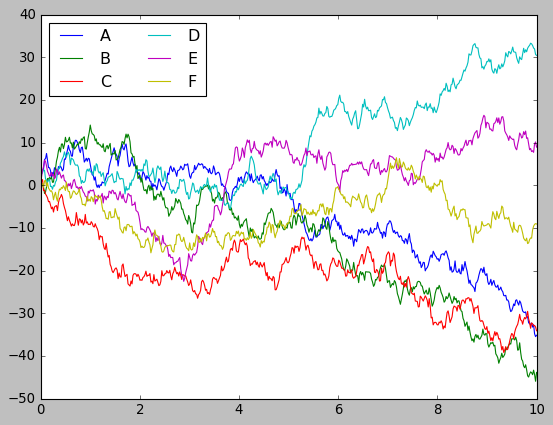

In [6]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Seaborn

Although the result contains all the information we'd like it to convey, let's take a look at how it works with Seaborn. 

Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's `set` method.
By convention, Seaborn is imported as `sns`.

In [7]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before.

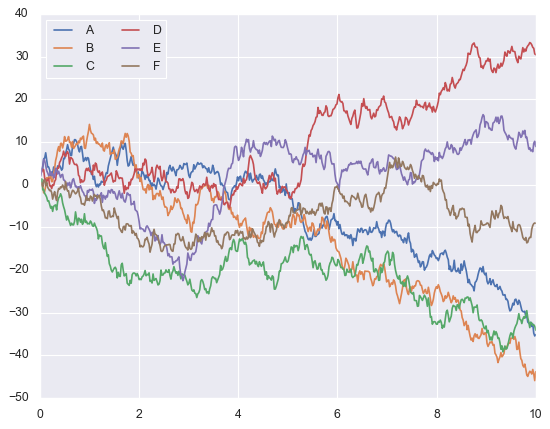

In [8]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.show()

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. 

1. Histograms, KDE and densities
1. Pair plots
1. Faceted histograms
1. Factor plots
1. Joint distributions
1. Bar plots

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. This is relatively straightforward in Matplotlib.

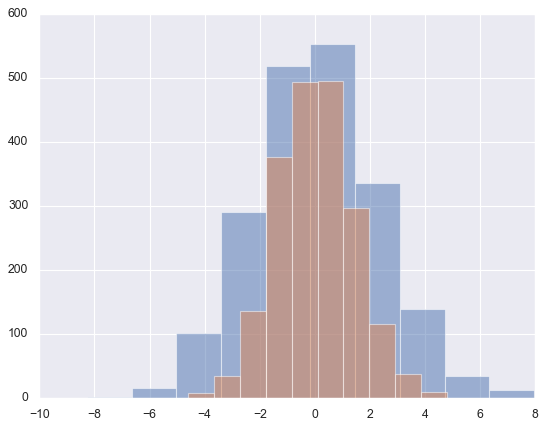

In [9]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``.

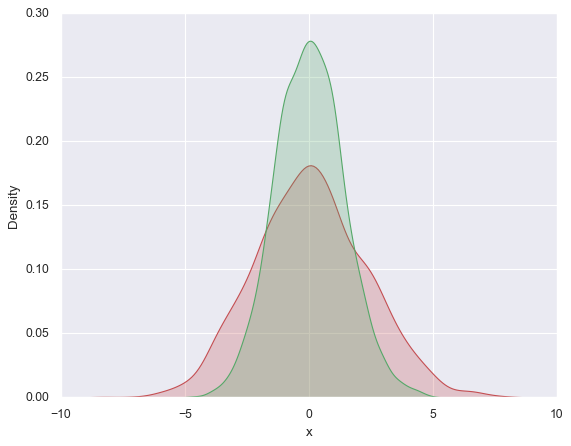

In [10]:
c={'x':'r','y':'g'}
for col in 'xy':
    sns.kdeplot(data[col], shade=True, color=c[col])

Histograms and KDE can be combined using ``displot``:

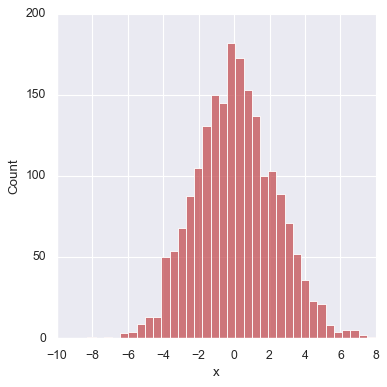

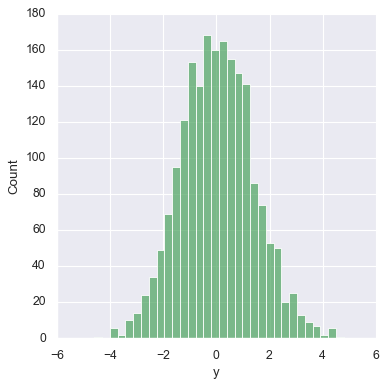

In [11]:
sns.displot(data['x'], color=c['x'])
sns.displot(data['y'], color=c['y'])
plt.show()

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background.

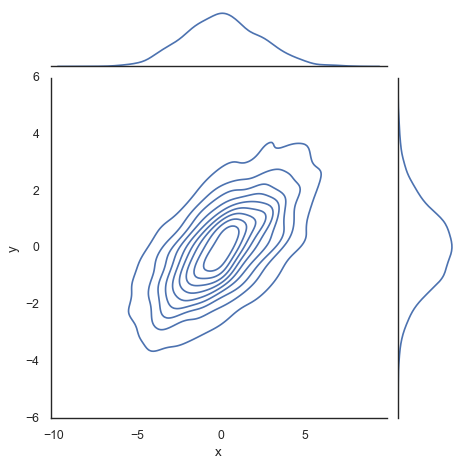

In [12]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde')
plt.show()    

There are other parameters that can be passed to ``jointplot`` — e.g, we can use a hexagonally based histogram instead.

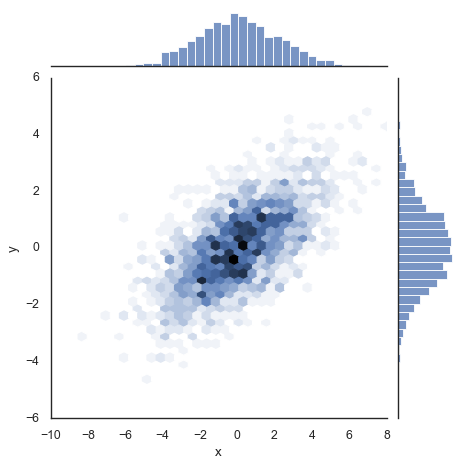

In [13]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

plt.show()

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll use this with the well-known `Iris` dataset, which lists measurements of petals and sepals of three iris species.

In [14]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``.

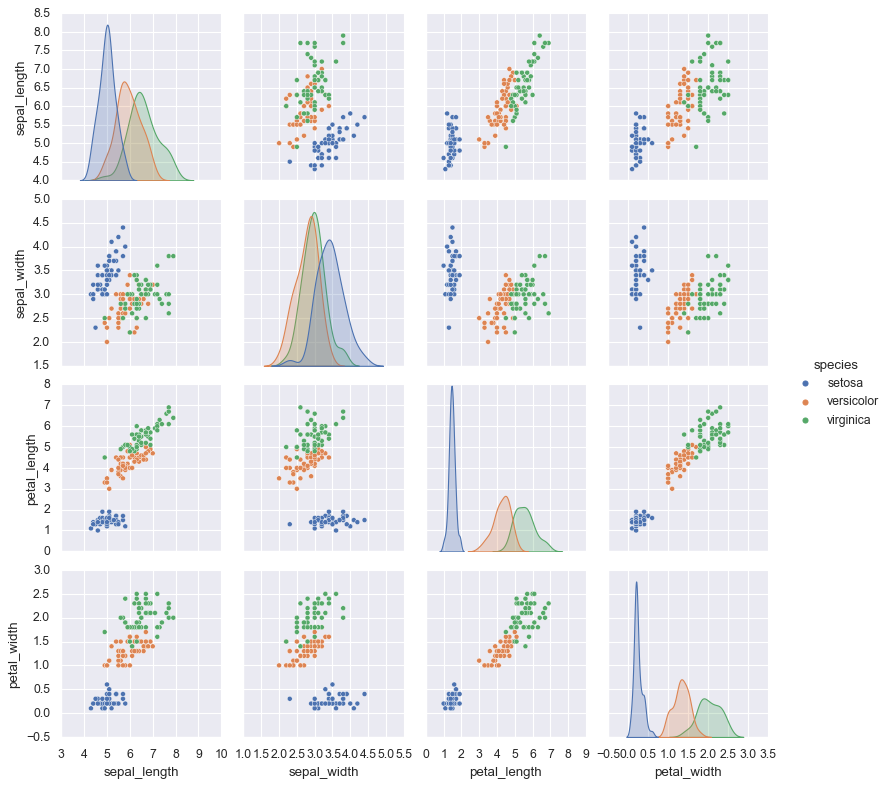

In [15]:
sns.pairplot(iris, hue='species', height=2.5)

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.

In [16]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


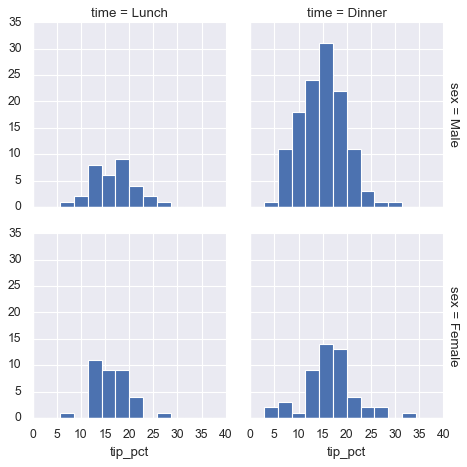

In [17]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter.

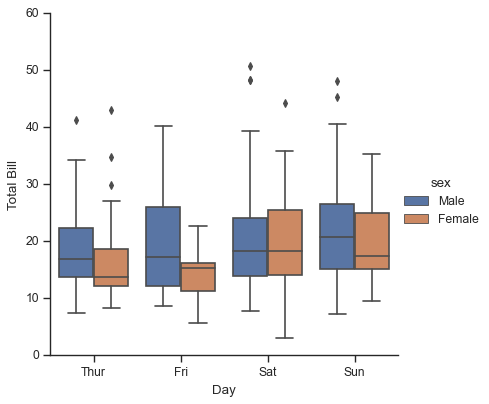

In [18]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions.

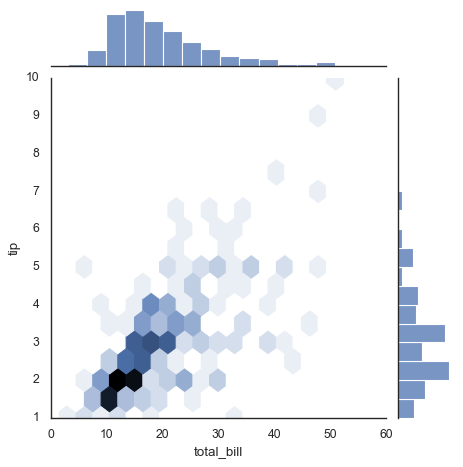

In [19]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

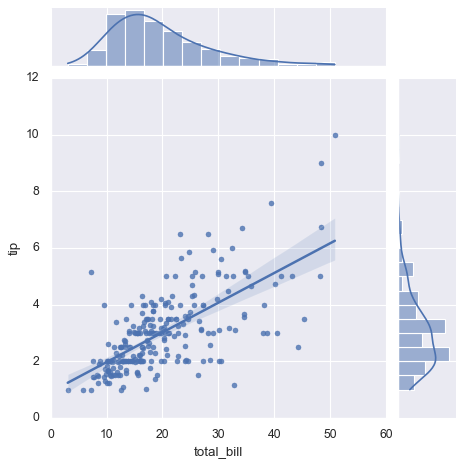

In [20]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')

### Bar plots

Time series can be plotted using ``sns.factorplot``. In the following example, we use the `Planets` data.

In [21]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


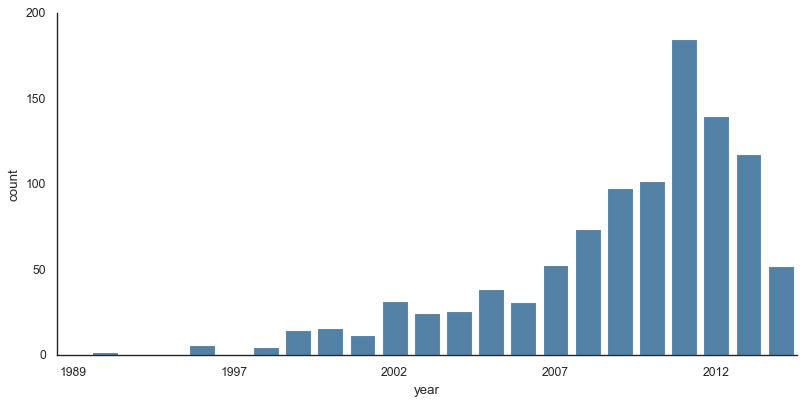

In [22]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    
    
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets.

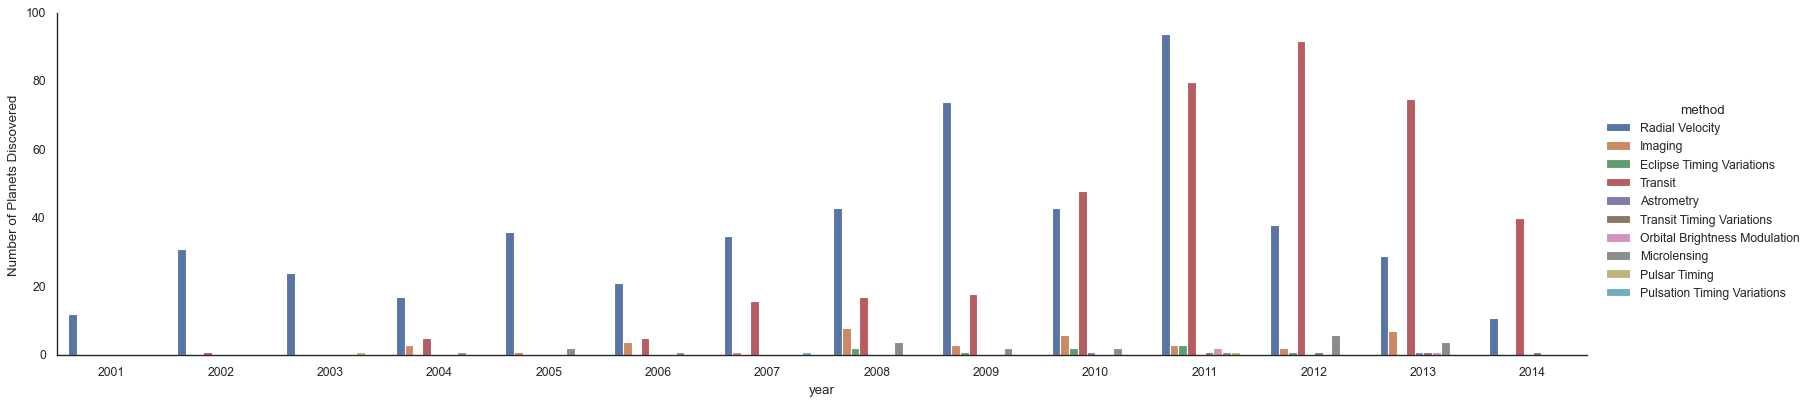

In [23]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).